In [ ]:
'''
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("Number of GPUs:", torch.cuda.device_count())
print("GPU name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")
'''


'\nimport torch\nimport torch.nn as nn\nimport torch.nn.functional as F\nimport torch.optim as optim\nfrom torch.utils.data import DataLoader, TensorDataset\n\nprint("PyTorch version:", torch.__version__)\nprint("CUDA available:", torch.cuda.is_available())\nprint("Number of GPUs:", torch.cuda.device_count())\nprint("GPU name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")\n'

# minst dataset trraining

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import datasets, layers, models
import numpy as np
# Load the MNIST dataset
(x_train , y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# 2. Preprocess data
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# 3. Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")  # 10 classes for digits 0–9
])

In [10]:
# 4. Compile model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# 5. Train model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.8)

# 6. Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8765 - loss: 0.4112 - val_accuracy: 0.9598 - val_loss: 0.1306
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9666 - loss: 0.1153 - val_accuracy: 0.9663 - val_loss: 0.1097
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9780 - loss: 0.0740 - val_accuracy: 0.9703 - val_loss: 0.0936
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9845 - loss: 0.0516 - val_accuracy: 0.9707 - val_loss: 0.0916
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9878 - loss: 0.0408 - val_accuracy: 0.9782 - val_loss: 0.0710
313/313 - 1s - 3ms/step - accuracy: 0.9795 - loss: 0.0598
Test Accuracy: 0.9795


In [14]:
test_prediction = model.predict(x_test)
predicted_labels = np.argmax(test_prediction, axis=1)
predicted_labels.shape
classes = 10
conf_matrix = np.zeros((classes, classes), dtype=int)
np.add.at(conf_matrix, (predicted_labels,y_test),1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [16]:
print('|'.rjust(7) ,'|'.join(map(lambda x:str(x).center(5,' '), range(10))), '| total')
print('='*75)
for i in range(len(conf_matrix)):
    print(str(i).center(5),'|', '|'.join(map(lambda x:str(x).center(5,' '), conf_matrix[i])),'|', conf_matrix[i].sum())
print('='*75)
print('total |' ,'|'.join(map(lambda x:str(x).center(5,' '), conf_matrix.sum(axis=0))))
print('perc  |' ,'|'.join(map(lambda x:str(round(x,2)).center(5,' '), conf_matrix.max(axis=0)/conf_matrix.sum(axis=0))))




      |   0  |  1  |  2  |  3  |  4  |  5  |  6  |  7  |  8  |  9   | total
  0   |  968 |  0  |  1  |  0  |  1  |  2  |  6  |  1  |  2  |  3   | 984
  1   |   0  | 1122|  2  |  0  |  0  |  0  |  2  |  1  |  0  |  0   | 1127
  2   |   3  |  3  | 1016|  3  |  2  |  0  |  0  |  10 |  1  |  1   | 1039
  3   |   0  |  5  |  3  | 1001|  1  |  9  |  1  |  3  |  4  |  7   | 1034
  4   |   1  |  0  |  0  |  0  | 934 |  0  |  3  |  0  |  1  |  0   | 939
  5   |   1  |  0  |  0  |  3  |  0  | 876 |  11 |  0  |  3  |  5   | 899
  6   |   2  |  1  |  1  |  0  |  2  |  1  | 933 |  0  |  0  |  0   | 940
  7   |   2  |  2  |  5  |  2  |  4  |  1  |  0  | 1006|  4  |  4   | 1030
  8   |   3  |  2  |  4  |  1  |  3  |  2  |  2  |  0  | 951 |  1   | 969
  9   |   0  |  0  |  0  |  0  |  35 |  1  |  0  |  7  |  8  | 988  | 1039
total |  980 | 1135| 1032| 1010| 982 | 892 | 958 | 1028| 974 | 1009
perc  |  0.99| 0.99| 0.98| 0.99| 0.95| 0.98| 0.97| 0.98| 0.98| 0.98


# digit extraction

In [20]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sumit17125/handwritten-images-dataset")

print("Path to dataset files:", path)

Resuming download from 2097152 bytes (25950903 bytes left)...
Resuming download from https://www.kaggle.com/api/v1/datasets/download/sumit17125/handwritten-images-dataset?dataset_version_number=1 (2097152/28048055) bytes left.


100%|██████████| 26.7M/26.7M [00:19<00:00, 1.33MB/s]

Extracting files...


Path to dataset files: C:\Users\HP\.cache\kagglehub\datasets\sumit17125\handwritten-images-dataset\versions\1


In [27]:
import os
imgpath = os.path.join(path, r'Handwritten_equations\\Handwritten_equations\\Handwritten\\Dataset')
os.listdir(imgpath)[:5]

['101_alfonso.bmp',
 '101_carlos.bmp',
 '101_caue.bmp',
 '101_danilo.bmp',
 '101_david.bmp']

In [30]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt

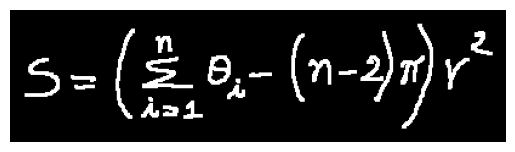

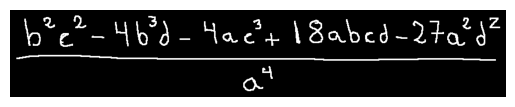

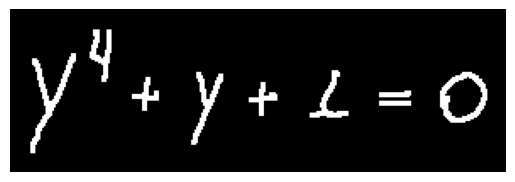

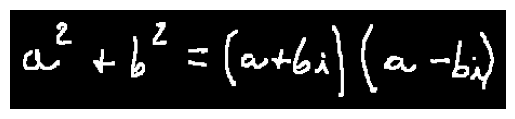

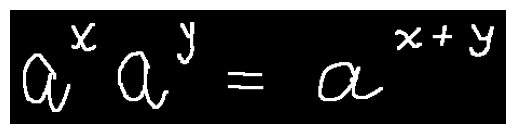

In [39]:
img_list = []
for i in range(0,100,20):
    img = os.listdir(imgpath)[i]

    i = Image.open(os.path.join(imgpath,img))
    cv2_img = np.array(i)
    cv2_img.shape

    mask = cv2_img > 140
    cv2_img[mask] = 255
    cv2_img[~mask] = 0
    img_list.append((cv2_img, mask))
    plt.imshow(cv2_img, cmap="gray")   # show in grayscale
    plt.axis("off")                   # hide axis ticks
    plt.show()



In [41]:
for idx, (cv2_img, mask) in enumerate(img_list):
    min_width = -1

    for j in range(mask.shape[1]):
        found= False
        for i in range(mask.shape[0]):
            if mask[i][j]:
                if min_width == -1:
                    min_width = j
                found = True

        if min_width != -1:
            max_width = j
            if found == False:
                break
    min_height = -1
    for i in range(mask.shape[0]):
        found = False
        for j in range(min_width, max_width):
            if mask[i][j]:
                if min_height == -1:
                    min_height = i
                found = True

        if min_height!= -1:
            max_height = i
            if found == False:
                break
    print(min_height,max_height, min_width,max_width)
    new_img = cv2_img[min_height:max_height, min_width:max_width]
    img_list[idx] = cv2_img, mask, new_img


40 72 12 41
12 71 12 925
26 85 12 39
12 33 12 57
41 95 12 56


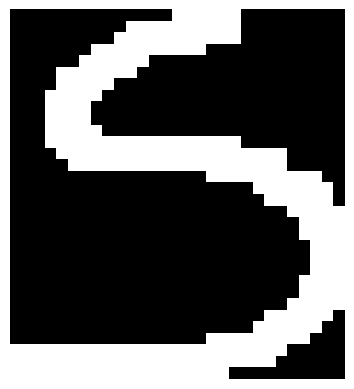

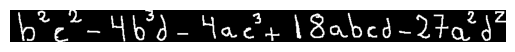

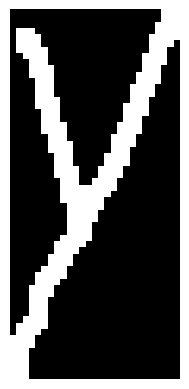

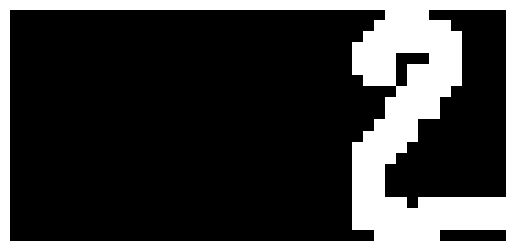

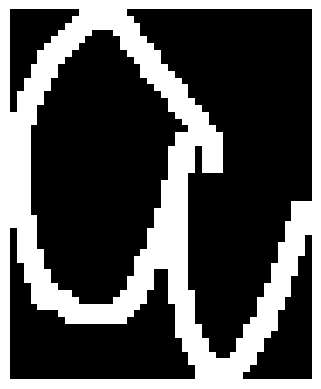

In [42]:

for cv2_img, mask, new_img in img_list:
    plt.imshow(new_img, cmap="gray")   # show in grayscale
    plt.axis("off")                   # hide axis ticks
    plt.show()


In [44]:
import cv2
import numpy as np

def extract_digits(img, threshold=140):
    """
    Extract multiple digits from a grayscale image.
    Returns list of cropped digit images.
    """
    # Step 1: Binarize
    _, thresh = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)

    # Step 2: Find contours (connected components)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    digits = []
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        digit = img[y:y+h, x:x+w]
        digits.append((x, digit))  # keep x for sorting

    # Step 3: Sort left-to-right
    digits = [d for _, d in sorted(digits, key=lambda x: x[0])]
    return digits


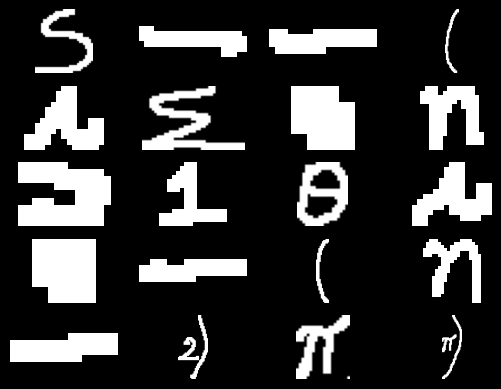

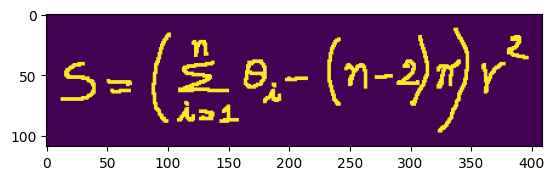

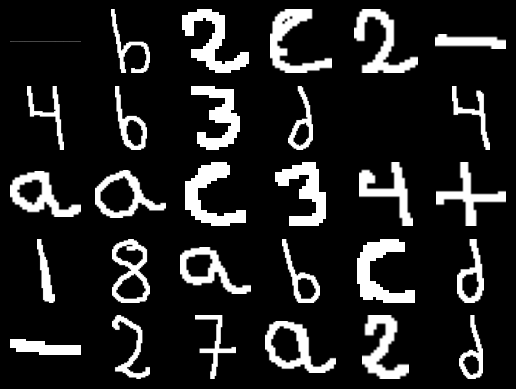

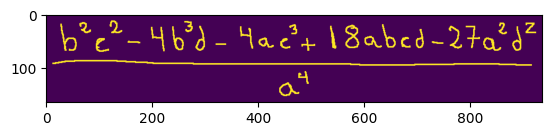

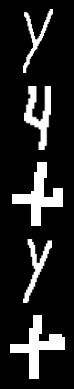

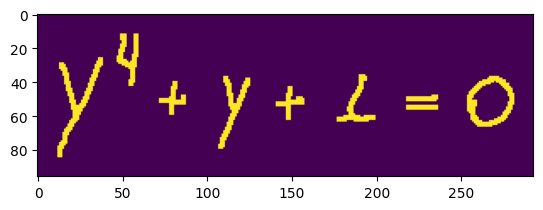

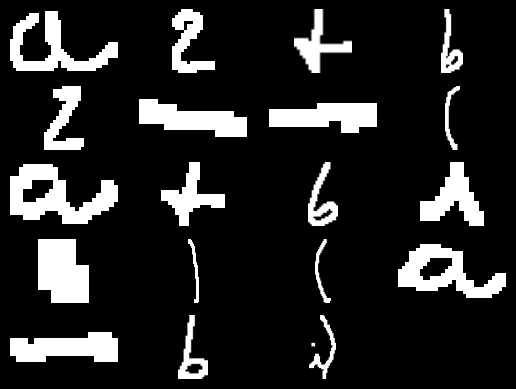

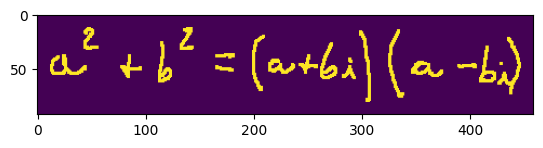

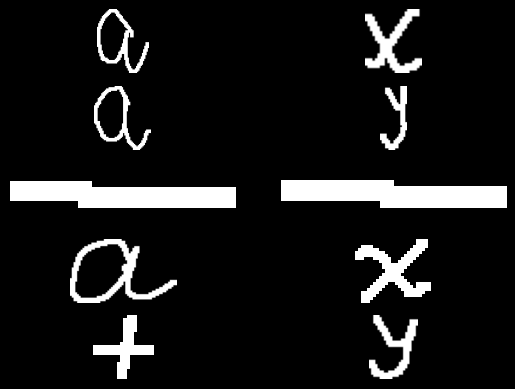

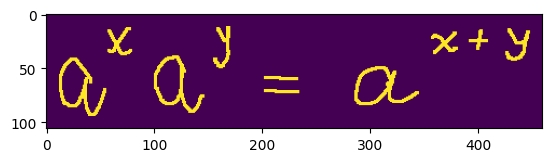

In [45]:
for cv2_img, mask, new_img in img_list:
    digits = extract_digits(cv2_img)
    fig, axes = plt.subplots(5,len(digits)//5)
    fig.patch.set_facecolor("black") 
    for i, d in enumerate(axes.flatten()):
        d.imshow(digits[i], cmap="gray")
        #d.title(f"Digit {i+1}")
        d.axis("off")

    plt.show()
    plt.imshow(cv2_img)
    plt.show()
